<a href="https://colab.research.google.com/github/AatmajRakshe/Synapse_LP/blob/Week_4/Copy_of_Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
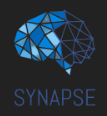

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [26]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [28]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
df=df.dropna()

In [31]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [32]:
#Write your code here
rel_avg = df.groupby('relationship')['fnlwgt'].mean().max()
rac_avg = df.groupby('race')['fnlwgt'].mean().max()
sex_avg = df.groupby('sex')['fnlwgt'].mean().max()

In [33]:
rel_avg

206017.29921259842

In [34]:
rac_avg

228807.4554490593

In [35]:
sex_avg

191650.24607458292

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [36]:
#write your code here
df = df.drop('education-num', axis=1)

In [37]:
unique_combo = df[['marital-status', 'relationship']].drop_duplicates()
unique_combo

,marital-status,relationship
0,Never-married,Not-in-family
1,Married-civ-spouse,Husband
2,Divorced,Not-in-family
4,Married-civ-spouse,Wife
6,Married-spouse-absent,Not-in-family
12,Never-married,Own-child
17,Never-married,Unmarried
19,Divorced,Unmarried
21,Separated,Unmarried
32,Divorced,Own-child


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [38]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
df['education']=LabelEncoder().fit_transform(df['education'])

In [39]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,9,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,11,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,7,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,11,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,11,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
cols = ['sex','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df = pd.get_dummies(df, columns=cols,dtype=int)
df

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,sex_Female,sex_Male,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,0,0,38,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,11,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,11,0,0,20,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [41]:
df

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,sex_Female,sex_Male,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,0,0,38,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,11,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,11,0,0,20,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#write your code here
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,sex_Female,sex_Male,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,11,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,11,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [44]:
#write your code here
X = df.drop(columns=['income'])
y=df['income']

In [45]:
X

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,sex_Female,sex_Male,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,0,0,38,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,11,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,11,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [48]:
X_train.shape

(21113, 88)

In [49]:
X_test.shape

(9049, 88)

### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [63]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(LogisticRegression(),param_grid=parameter,scoring='accuracy',cv=5)

Find the accuracy and confusion matrix for the same and explain what it shows.

In [64]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [65]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [66]:
classifier_regressor.best_score_

0.7913605570451587

In [67]:
y_pred=classifier_regressor.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, classification_report
acc=accuracy_score(y_pred,y_test)
acc

0.7852801414520941

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [92]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [86]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(21113, 88)
(9049, 88)
(21113,)
(9049,)


In [88]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [89]:
clf.score(X_test,y_test)

0.7852801414520941

In [90]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
X_train_count = CountVectorizer().fit_transform(X_train)
X_train_count.toarray()[:]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [93]:
mod= MultinomialNB()
mod.fit(X_train,y_train)

MultinomialNB()

In [95]:
mod.score(X_test, y_test)

0.7717979887280363

In [96]:
mod.score(X_train, y_train)

0.7777198882205276

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [111]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt_mod=DecisionTreeClassifier(random_state=42)
dt_mod.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
dt_mod.score(X_train,y_train)

1.0

In [103]:
dt_mod.score(X_test,y_test)

0.8116918996574207

In [105]:
dt_mod.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

<b>Print the Model Accuracy</b>

In [107]:
y_pred=dt_mod.predict_proba(X_test)[:,1]
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [108]:
new_y=[]
for i in range(len(y_pred)):
  if y_pred[i]<0.6:
    new_y.append(0)
  else:
    new_y.append(1)

In [110]:
accuracy_score(y_test,new_y)

0.8116918996574207

In [115]:
train_accuracy = []
validation_accuracy = []

for depth in range(1, 10):

    dt_mod = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_mod.fit(X_train, y_train)
    train_accuracy.append(dt_mod.score(X_train, y_train))

    validation_accuracy.append(dt_mod.score(X_test, y_test))


In [116]:
f=pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train_accuracy,'valid_accuracy':validation_accuracy})
f

,max_depth,train_accuracy,valid_accuracy
0,1,0.752475,0.747817
1,2,0.800028,0.791248
2,3,0.800786,0.791800
3,4,0.817506,0.811802
4,5,0.818311,0.812023
5,6,0.833799,0.825064
6,7,0.849477,0.845618
7,8,0.853787,0.846723
8,9,0.859613,0.844513


Text(0, 0.5, 'Performance')

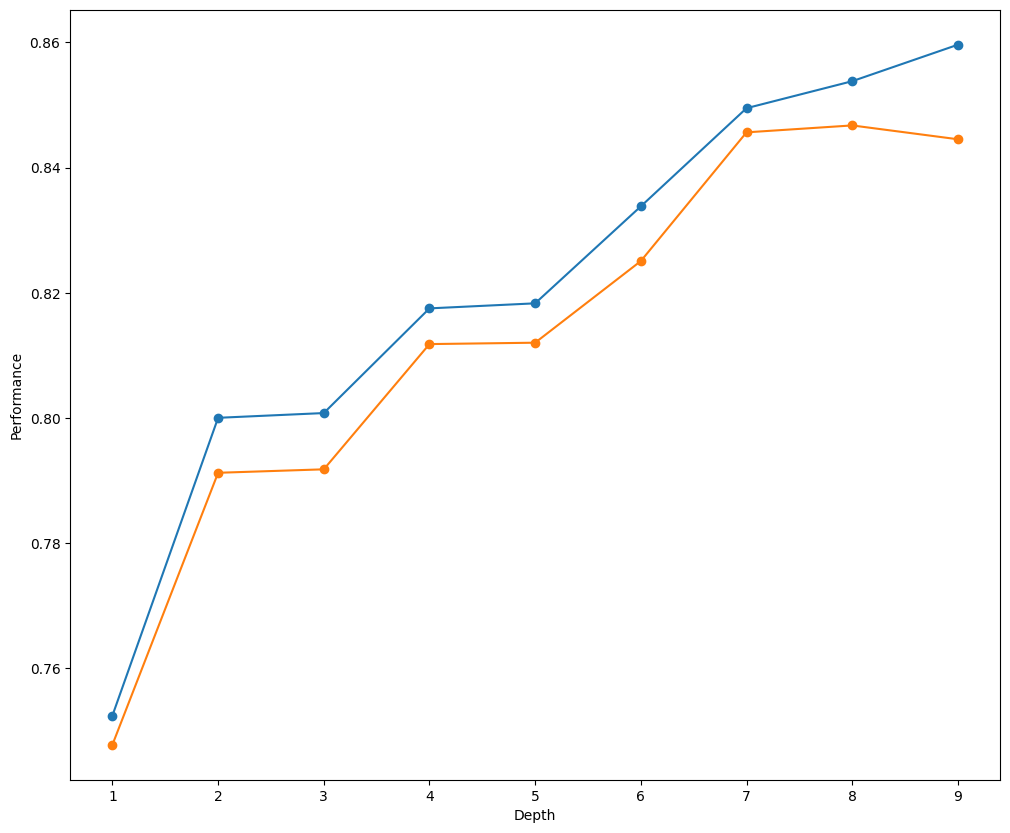

In [120]:
plt.figure(figsize=(12,10))
plt.plot(f['max_depth'],f['train_accuracy'],marker='o')
plt.plot(f['max_depth'],f['valid_accuracy'],marker='o')
plt.xlabel('Depth')
plt.ylabel('Performance')

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:

### Mention some real life use cases for each of these three models:

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)

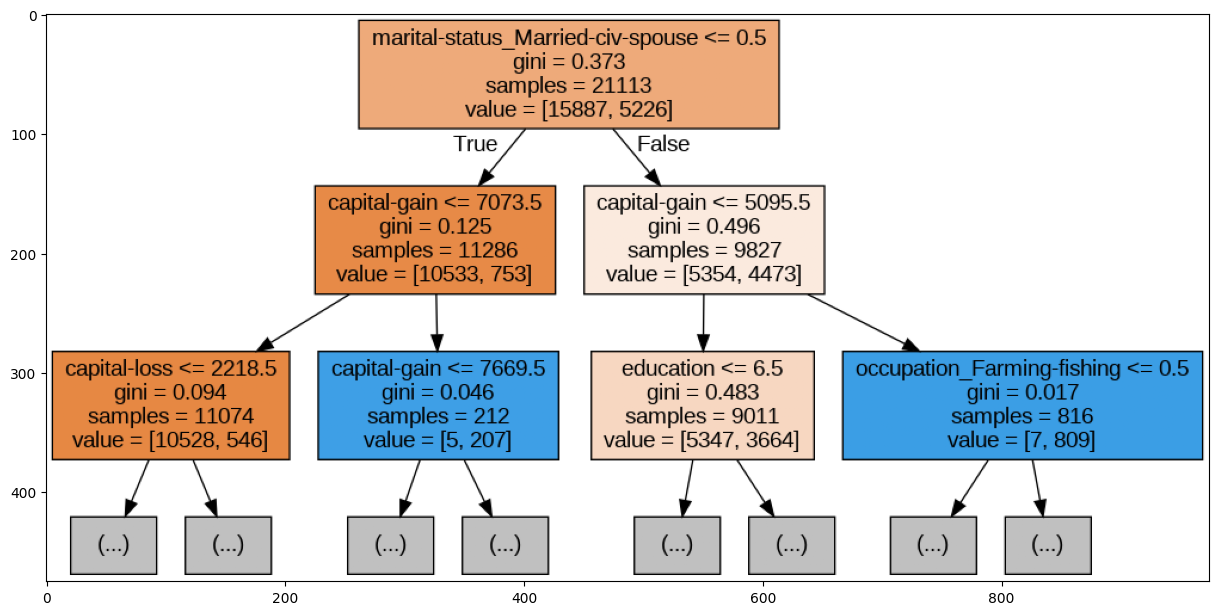

In [121]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [122]:
#write code here
from sklearn.tree import DecisionTreeClassifier
t = []
v= []

for msl in range(1, 10):

    dt_model = DecisionTreeClassifier(min_samples_leaf=msl, random_state=10)
    dt_model.fit(X_train, y_train)
    t.append(dt_model.score(X_train, y_train))
    v.append(dt_model.score(X_test, y_test))

In [124]:
fr=pd.DataFrame({'min_sample_leaf':range(1,10),'train_accuracy':train_accuracy,'valid_accuracy':validation_accuracy})
fr

,min_sample_leaf,train_accuracy,valid_accuracy
0,1,0.752475,0.747817
1,2,0.800028,0.791248
2,3,0.800786,0.791800
3,4,0.817506,0.811802
4,5,0.818311,0.812023
5,6,0.833799,0.825064
6,7,0.849477,0.845618
7,8,0.853787,0.846723
8,9,0.859613,0.844513


Text(0, 0.5, 'Performance')

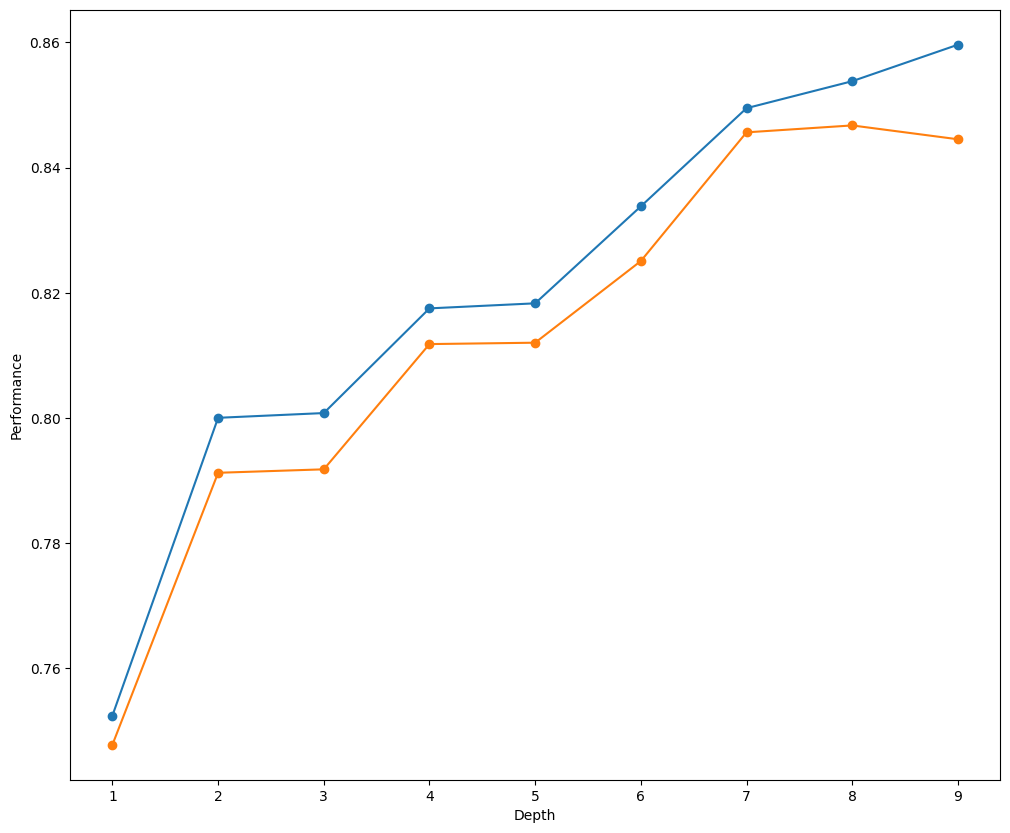

In [130]:
plt.figure(figsize=(12,10))
plt.plot(fr['min_sample_leaf'],fr['train_accuracy'],marker='o')
plt.plot(fr['min_sample_leaf'],fr['valid_accuracy'],marker='o')
plt.xlabel('Depth')
plt.ylabel('Performance')

### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [134]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=8,max_leaf_nodes=25,min_samples_leaf=10,min_samples_split=4,random_state=10)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [136]:
#find the accuracy
rfc.score(X_train,y_train)

0.8411878937147729

In [137]:
rfc.score(X_test,y_test)

0.8381036578627473

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans:

In [138]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [141]:
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

In [142]:
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [144]:
y_pred = bagging_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8406453751795778

In [145]:
bagging_clf.score(X_train, y_train)

0.9863591152370578

In [146]:
bagging_clf.score(X_test, y_test)

0.8406453751795778

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [149]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
ada_mod=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=42)
mod2=ada_mod.fit(X_train,y_train)

In [150]:
mod2.score(X_train,y_train)

0.8619334059584143

In [151]:
mod2.score(X_test,y_test)

0.8626367554425903

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [154]:
import xgboost as xgb
xgb_mod = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_mod.fit(X_train, y_train)
xgb_mod.score(X_train,y_train)

0.8640174300194193

In [155]:
xgb_mod.score(X_test,y_test)

0.8618631893026854

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [156]:
#implement pruning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

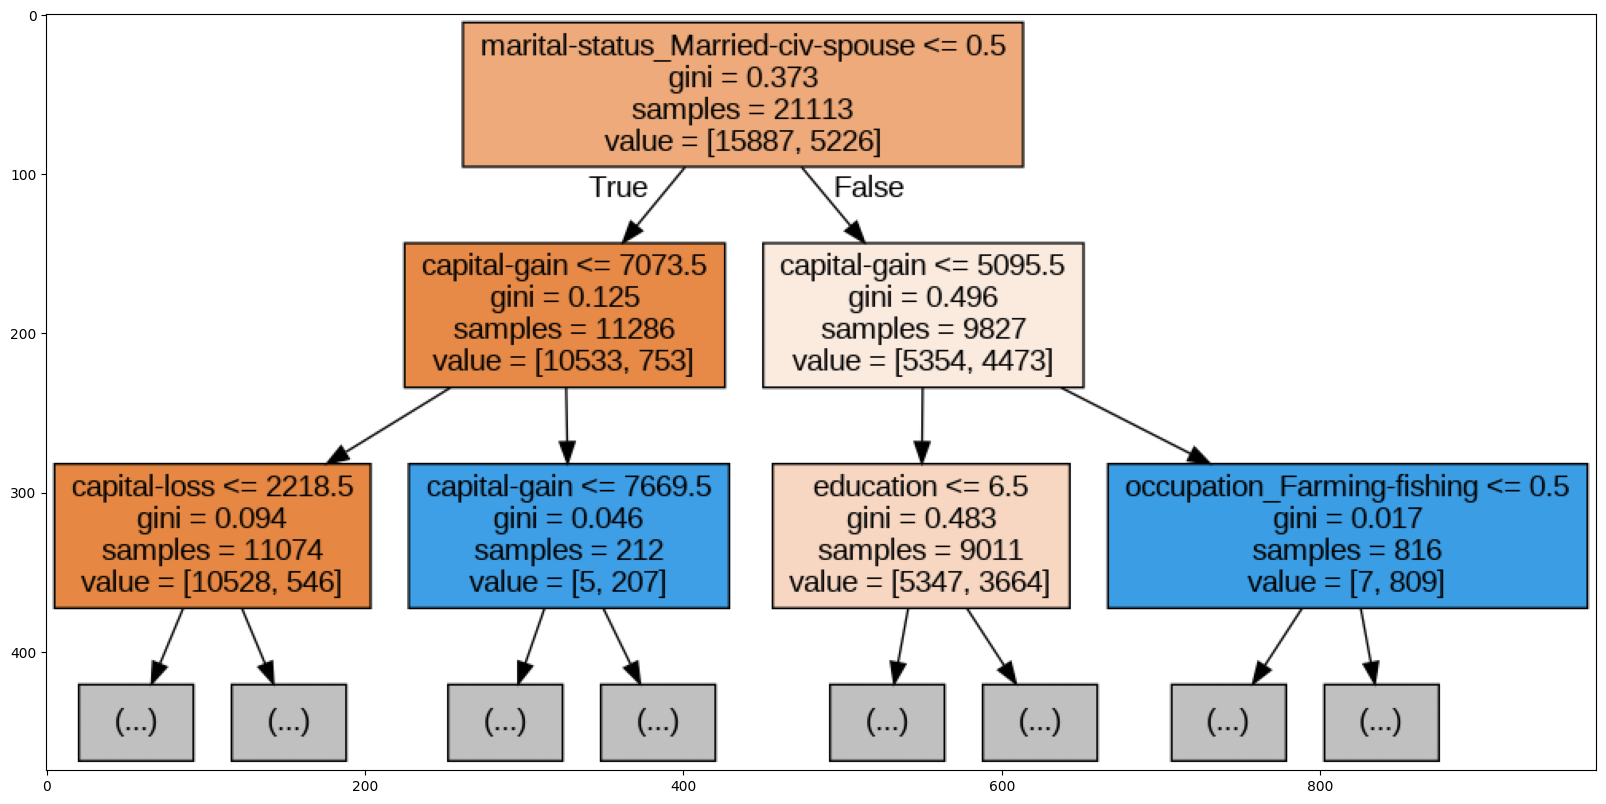

In [157]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(clf, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025